Use the new cice grid scripts and compare it to the old results

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cf_xarray
import rioxarray

In [2]:
_data_dir = '/g/data/ik11/inputs/access-om2/input_20201102/'

In [3]:
cd /g/data/tm70/as2285/om3-scripts/grid_generation

/g/data/tm70/as2285/om3-scripts/grid_generation


In [4]:
res = ['1deg', '025deg', '01deg']

# From esmgrids script

1deg
new vars not in old?
{'tripolar'}
missing vars in new?
{'hue', 'latu_bonds', 'latt_bonds', 'hun', 'lont_bonds', 'lonu_bonds'}
ulon anom min: nan, anom max: nan
angleT anom min: nan, anom max: nan
hte anom min: nan, anom max: nan
ulat anom min: nan, anom max: nan
tarea anom min: -19085417.985637665, anom max: 9877771.11514306
tlon anom min: nan, anom max: nan
angle anom min: nan, anom max: nan
uarea anom min: -1186349698.6215067, anom max: 33617654.79803729
tlat anom min: nan, anom max: nan
htn anom min: nan, anom max: nan
025deg
new vars not in old?
{'tripolar'}
missing vars in new?
set()
ulon anom min: 3.620558794636963e-05, anom max: 3.141592653589793
angleT anom min: nan, anom max: nan
hte anom min: nan, anom max: nan
ulat anom min: -0.0018422347075643941, anom max: 0.0018422347075643941
tarea anom min: nan, anom max: nan
tlon anom min: nan, anom max: nan
angle anom min: -1.5707963267948966, anom max: 1.5707963267948966
uarea anom min: -69552757.44506374, anom max: 7366673.8007

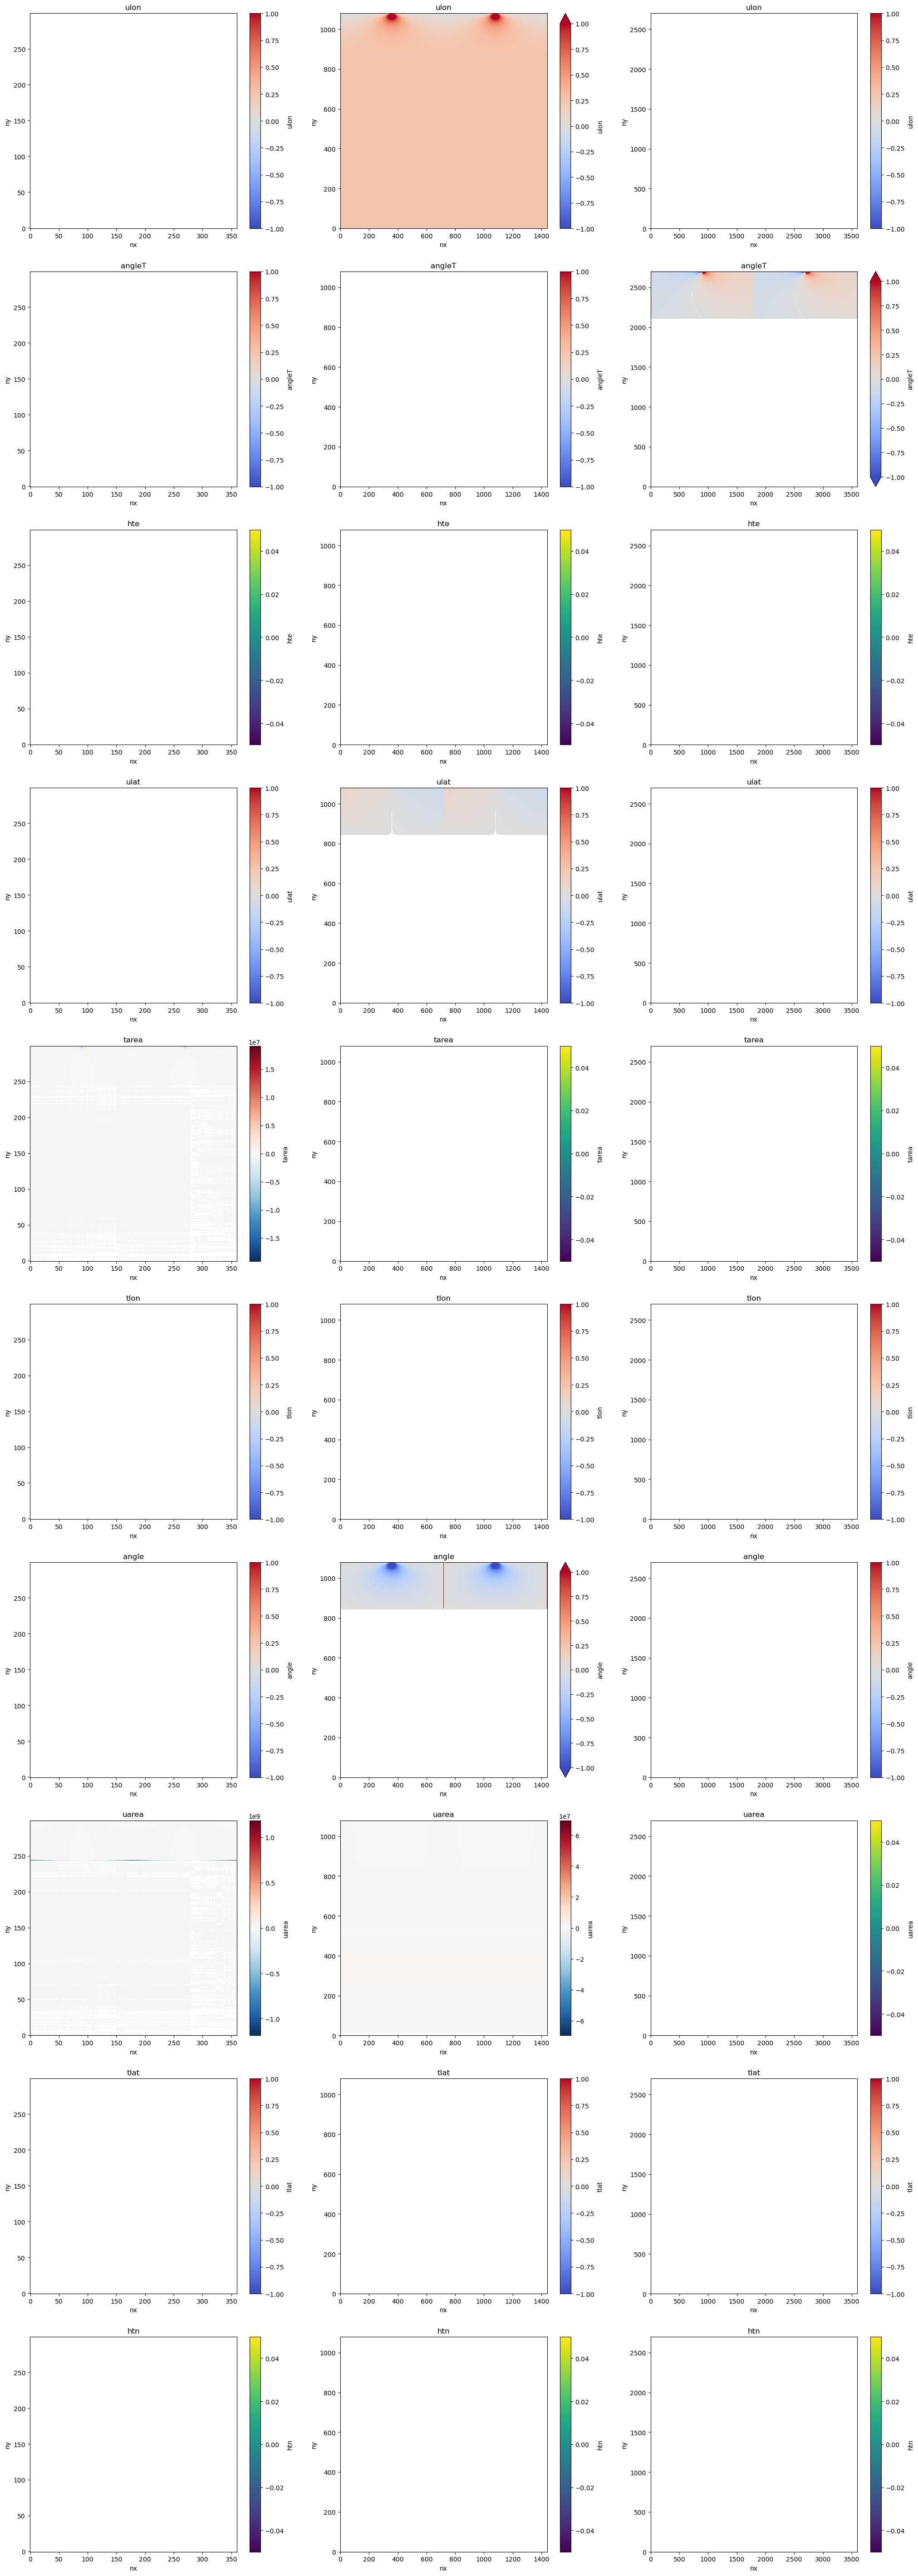

In [12]:
plt.figure(figsize=(25,80))

for i,iRes in enumerate(res):

    old_cice_grid = xr.open_dataset(f'{_data_dir}/cice_{iRes}/grid.nc')
    new_cice_grid = xr.open_dataset(f'{iRes}/grid.nc')

    print(iRes)
    print("new vars not in old?")
    print(set(new_cice_grid.variables).difference(old_cice_grid.variables))
    print("missing vars in new?")
    print(set(old_cice_grid.variables).difference(new_cice_grid.variables))
    
    for j,jVar in enumerate(set(new_cice_grid.variables).intersection(old_cice_grid.variables)):
        
        plt.subplot(
            len(new_cice_grid.variables),
            len(res),
            i+(j*len(res))+1
        )
        
                
        anom = (new_cice_grid[jVar]-old_cice_grid[jVar])

        anom = anom.where(abs(anom)>2e-6)

        print(f'{jVar} anom min: {anom.min().values}, anom max: {anom.max().values}')

        
        if (jVar in (['ulat','ulon','tlat','tlon', 'angle', 'angleT'])):
            anom = np.rad2deg(anom)        
            anom.plot(vmin=-1, vmax=1, cmap='coolwarm')
        else:
            anom.plot()

        
        plt.title(jVar)

In [13]:
new_cice_grid

<xarray.Dataset> Size: 778MB
Dimensions:   (ny: 2700, nx: 3600)
Coordinates:
    ulat      (ny, nx) float64 78MB ...
    ulon      (ny, nx) float64 78MB ...
    tlat      (ny, nx) float64 78MB ...
    tlon      (ny, nx) float64 78MB ...
Dimensions without coordinates: ny, nx
Data variables:
    tripolar  |S1 1B ...
    htn       (ny, nx) float64 78MB ...
    hte       (ny, nx) float64 78MB ...
    angle     (ny, nx) float64 78MB ...
    angleT    (ny, nx) float64 78MB ...
    tarea     (ny, nx) float64 78MB ...
    uarea     (ny, nx) float64 78MB ...
Attributes:
    timeGenerated:    2024-03-20 15:34:34.828367
    created_by:       as2285
    history:          Created using commit bf5807494755222c399f89763cb4fe9db7...
    inputfile:        /g/data/ik11/inputs/access-om2/input_20201102/mom_01deg...
    inputfile_md5:    c6d7acf7fe7d6df5d5b72ebf37d11f90
    history_command:  python make_CICE_grid.py /g/data/ik11/inputs/access-om2...

In [14]:
new_cice_grid.cf

Coordinates:
             CF Axes:   X, Y, Z, T: n/a

      CF Coordinates:   longitude: ['tlon', 'ulon']
                        latitude: ['tlat', 'ulat']
                        vertical, time: n/a

       Cell Measures:   area, volume: n/a

      Standard Names:   latitude: ['tlat', 'ulat']
                        longitude: ['tlon', 'ulon']

              Bounds:   n/a

       Grid Mappings:   n/a

Data Variables:
       Cell Measures:   area, volume: n/a

      Standard Names:   angle_of_rotation_from_east_to_x: ['angle', 'angleT']
                        cell_area: ['tarea', 'uarea']

              Bounds:   n/a

       Grid Mappings:   tripolar_latitude_longitude: ['tripolar']

In [35]:
new_cice_grid.rio.crs

In [7]:
rio_ds = rioxarray.open_rasterio(f'01deg/grid.nc')

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/rioxarray/_io.py:1132: NotGeore

In [8]:
rio_ds

<xarray.Dataset> Size: 778MB
Dimensions:      (band: 1, x: 3600, y: 2700)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 29kB 0.5 1.5 2.5 ... 3.598e+03 3.598e+03 3.6e+03
  * y            (y) float64 22kB 0.5 1.5 2.5 ... 2.698e+03 2.698e+03 2.7e+03
    spatial_ref  int64 8B 0
Data variables:
    ulat         (band, y, x) float64 78MB ...
    uarea        (band, y, x) float64 78MB ...
    ulon         (band, y, x) float64 78MB ...
    tlat         (band, y, x) float64 78MB ...
    tlon         (band, y, x) float64 78MB ...
    htn          (band, y, x) float64 78MB ...
    hte          (band, y, x) float64 78MB ...
    angle        (band, y, x) float64 78MB ...
    angleT       (band, y, x) float64 78MB ...
    tarea        (band, y, x) float64 78MB ...
Attributes:
    created_by:       as2285
    history:          Created using commit bf5807494755222c399f89763cb4fe9db7...
    history_command:  python make_CICE_grid.py /g/data/ik11/inputs/access-om2...
    inputfile:        /g/data/ik11/inputs/access-om2/input_20201102/mom_01deg...
    inputfile_md5:    c6d7acf7fe7d6df5d5b72ebf37d11f90
    timeGenerated:    2024-03-20 15:34:34.828367

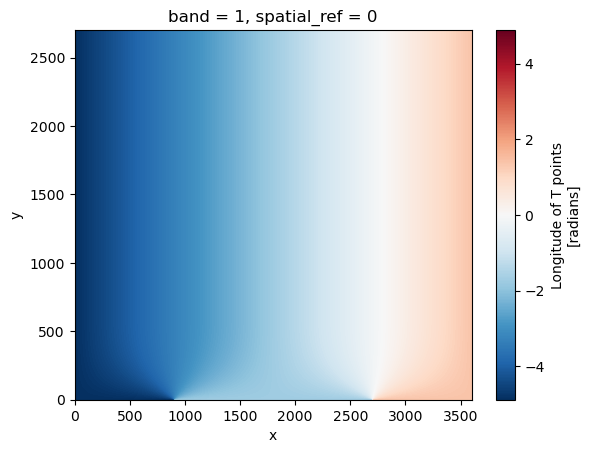

In [9]:
rio_ds.tlon.plot()

In [11]:
! gdalinfo NETCDF:01deg/grid.nc:uarea

Driver: netCDF/Network Common Data Format
Files: 01deg/grid.nc
Size is 3600, 2700
Metadata:
  NC_GLOBAL#created_by=as2285
  NC_GLOBAL#history=Created using commit bf5807494755222c399f89763cb4fe9db710b528 of git@github.com:COSIMA/om3-scripts.git
  NC_GLOBAL#history_command=python make_CICE_grid.py /g/data/ik11/inputs/access-om2/input_20201102/mom_01deg/ocean_hgrid.nc /g/data/ik11/inputs/access-om2/input_20201102/mom_01deg/ocean_mask.nc
  NC_GLOBAL#inputfile=/g/data/ik11/inputs/access-om2/input_20201102/mom_01deg/ocean_hgrid.nc
  NC_GLOBAL#inputfile_md5=c6d7acf7fe7d6df5d5b72ebf37d11f90
  NC_GLOBAL#timeGenerated=2024-03-20 15:34:34.828367
  uarea#cell_measures=area
  uarea#coordinates=ulat ulon
  uarea#long_name=Area of U cells.
  uarea#standard_name=cell_area
  uarea#units=m^2
Geolocation:
  GEOREFERENCING_CONVENTION=PIXEL_CENTER
  LINE_OFFSET=0
  LINE_STEP=1
  PIXEL_OFFSET=0
  PIXEL_STEP=1
  SRS=GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7

In [17]:
! gdalinfo NETCDF:{_data_dir}/cice_01deg/grid.nc:uarea

Driver: netCDF/Network Common Data Format
Files: /g/data/ik11/inputs/access-om2/input_20201102//cice_01deg/grid.nc
Size is 3600, 2700
Metadata:
  uarea#title=Area of U cells.
  uarea#units=m^2
Corner Coordinates:
Upper Left  (    0.0,    0.0)
Lower Left  (    0.0, 2700.0)
Upper Right ( 3600.0,    0.0)
Lower Right ( 3600.0, 2700.0)
Center      ( 1800.0, 1350.0)
Band 1 Block=3600x1 Type=Float64, ColorInterp=Undefined
  NoData Value=9.969209968386869e+36
  Unit Type: m^2
  Metadata:
    NETCDF_VARNAME=uarea
    title=Area of U cells.
    units=m^2


In [43]:
iRes = '1deg'
old_cice_grid = xr.open_dataset(f'{_data_dir}/cice_{iRes}/grid.nc')
new_cice_grid = xr.open_dataset(f'{iRes}/grid.nc')

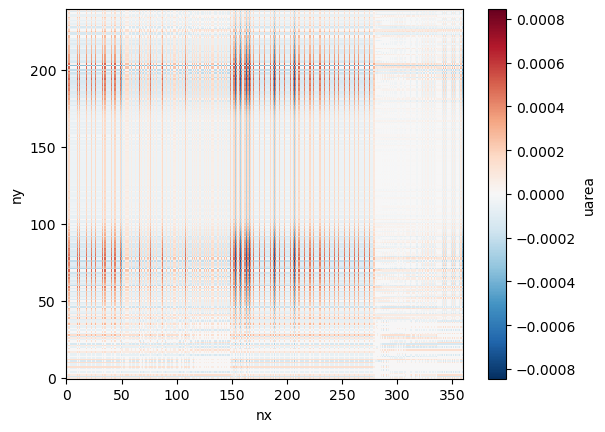

In [23]:
(new_cice_grid-old_cice_grid).sel(ny=slice(None,240)).uarea.plot()

More detail on 0.25 uarea

In [53]:
iRes = '025deg'
old_cice_grid = xr.open_dataset(f'{_data_dir}/cice_{iRes}/grid.nc')
new_cice_grid = xr.open_dataset(f'{iRes}/grid.nc')

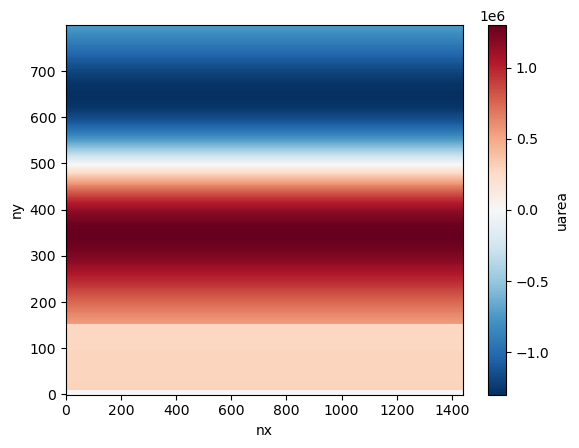

In [54]:
(new_cice_grid-old_cice_grid).sel(ny=slice(None,800)).uarea.plot()

Uarea was just set the same as tarea!

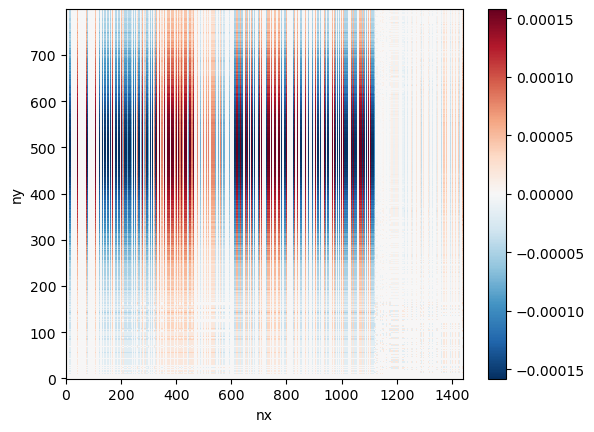

In [60]:
(old_cice_grid.tarea-old_cice_grid.uarea).isel(ny=slice(None,800)).plot()

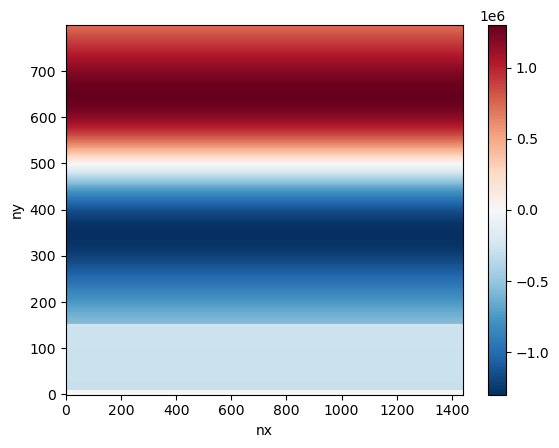

In [61]:
(new_cice_grid.tarea-new_cice_grid.uarea).isel(ny=slice(None,800)).plot()

# From Ezhil's script

Let set our tolerance to 2e-6 as precision of float32 is 1e.6:

In [33]:
np.finfo(np.float32)

finfo(resolution=1e-06, min=-3.4028235e+38, max=3.4028235e+38, dtype=float32)

Plot all the differences in all vars and resolutions:

In [ ]:
plt.figure(figsize=(25,80))

for i,iRes in enumerate(res):

    old_cice_grid = xr.open_dataset(f'{_data_dir}/cice_{iRes}/grid.nc')
    new_cice_grid = xr.open_dataset(f'ezhil/grid_{iRes}.nc')

    print(iRes)
    print("new vars not in old?")
    print(set(new_cice_grid.data_vars).difference(old_cice_grid.data_vars))
    print("missing vars in new?")
    print(set(old_cice_grid.data_vars).difference(new_cice_grid.data_vars))
    
    for j,jVar in enumerate(new_cice_grid.data_vars):
        
        plt.subplot(
            len(new_cice_grid.data_vars),
            len(res),
            i+(j*len(res))+1
        )
        
                
        anom = (new_cice_grid[jVar]-old_cice_grid[jVar])

        anom = anom.where(abs(anom)>2e-6)

        print(f'{jVar} anom min: {anom.min().values}, anom max: {anom.max().values}')

        
        if (jVar in (['ulat','ulon','tlat','tlon'])):
            anom = np.rad2deg(anom)        
            anom.plot(vmin=-1, vmax=1, cmap='coolwarm')
        else:
            anom.plot()

        
        plt.title(jVar)

1deg
new vars not in old?
set()
missing vars in new?
{'lont_bonds', 'lonu_bonds', 'latu_bonds', 'latt_bonds', 'hue', 'hun'}
ulat anom min: nan, anom max: nan
ulon anom min: nan, anom max: nan
tlat anom min: nan, anom max: nan
tlon anom min: nan, anom max: nan
htn anom min: nan, anom max: nan
hte anom min: nan, anom max: nan
angle anom min: nan, anom max: nan
angleT anom min: nan, anom max: nan
tarea anom min: -19085417.985637665, anom max: 9877771.11514306
uarea anom min: -1186349698.6215067, anom max: 33617654.79803729
025deg
new vars not in old?
set()
missing vars in new?
set()
ulat anom min: -0.0018422347075643941, anom max: 0.0018422347075643941
ulon anom min: 3.620558794636963e-05, anom max: 3.141592653589793
tlat anom min: nan, anom max: nan
tlon anom min: nan, anom max: nan
htn anom min: nan, anom max: nan
hte anom min: nan, anom max: nan
angle anom min: -1.5707963267948966, anom max: 1.5707963267948966
angleT anom min: nan, anom max: nan
tarea anom min: nan, anom max: nan
uarea

More detail on 0.1 degree ulat/ulon and angle

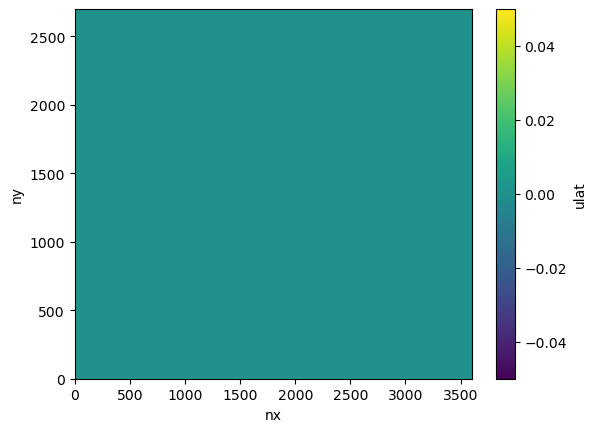

In [14]:
np.rad2deg((new_cice_grid-old_cice_grid).ulat).plot()

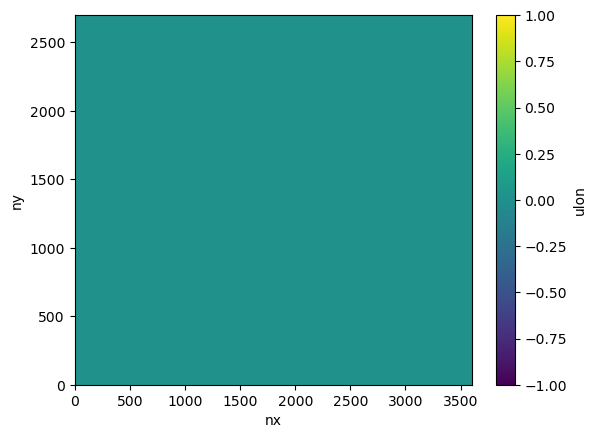

In [15]:
np.rad2deg((new_cice_grid-old_cice_grid).ulon).plot(vmin=-1, vmax=1)

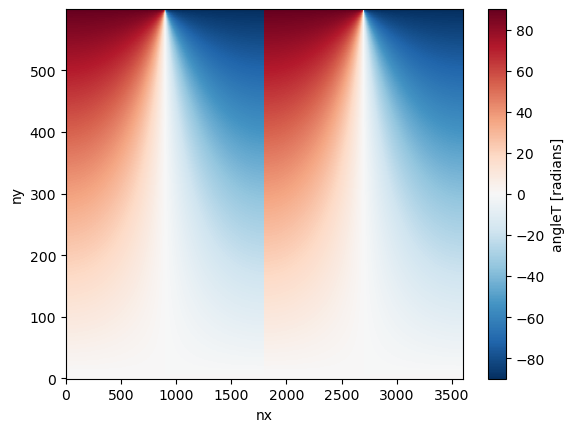

In [22]:
np.rad2deg(old_cice_grid.sel(ny=slice(2100,None)).angleT).plot() #vmin=-1, vmax=1)

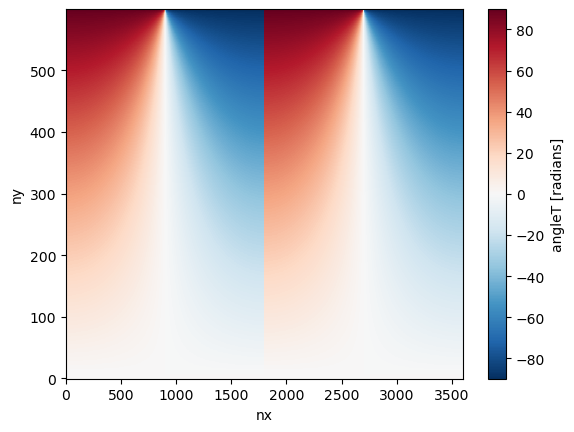

In [23]:
np.rad2deg(new_cice_grid.sel(ny=slice(2100,None)).angleT).plot() #vmin=-1, vmax=1)

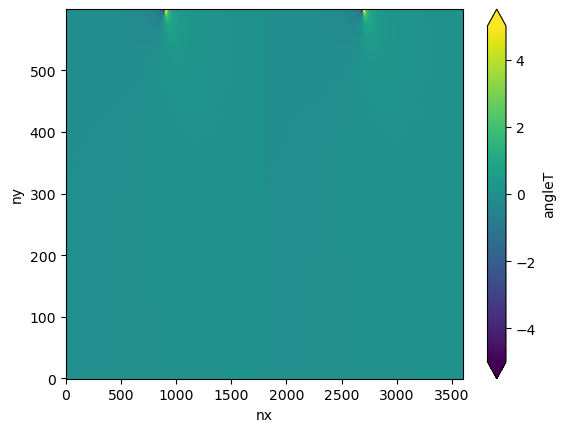

In [24]:
np.rad2deg((new_cice_grid-old_cice_grid).sel(ny=slice(2100,None)).angleT).plot(vmin=-5, vmax=5)

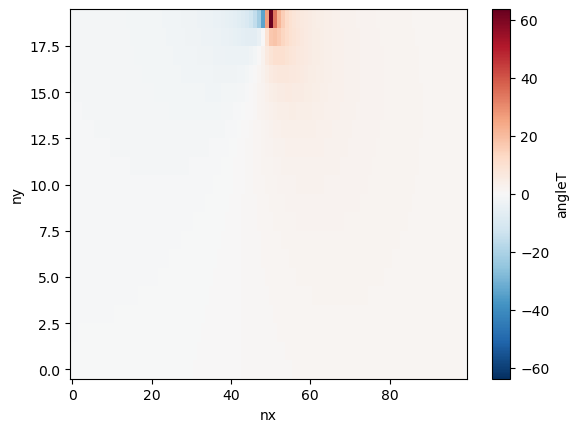

In [28]:
np.rad2deg((new_cice_grid-old_cice_grid).sel(ny=slice(2680,None), nx=slice(850,950)).angleT).plot()

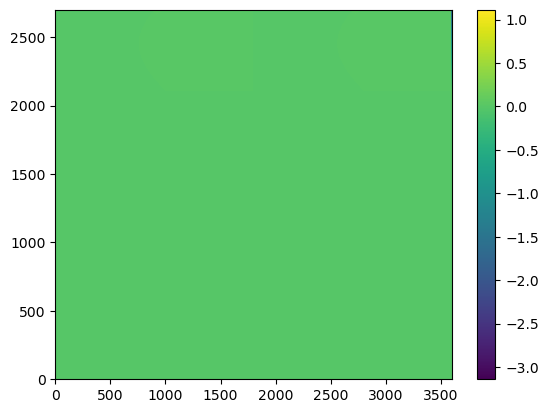

In [16]:
plt.pcolor(new_cice_grid.angleT.values-old_cice_grid.angleT.values)
plt.colorbar()

what is going on with 0.25 deg angle?

In [6]:
old_cice_grid = xr.open_dataset(f'{_data_dir}/cice_025deg/grid.nc')
new_cice_grid = xr.open_dataset(f'grid_025deg.nc')


0.3.0


Looks to be the same problem as ulat / ulon, x is offset by 1:

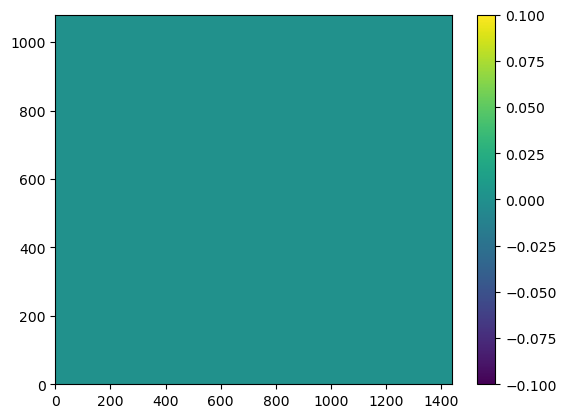

In [7]:
plt.pcolor(new_cice_grid.angle[:,:-1].values-old_cice_grid.angle[:,1:].values)
plt.colorbar()